In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
df = pd.read_csv('1.csv')

In [3]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['sqrt_A'], autolag='AIC') 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

ModuleNotFoundError: No module named 'statsmodels'

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


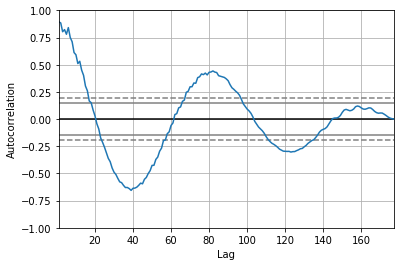

In [49]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['sqrt_A'])

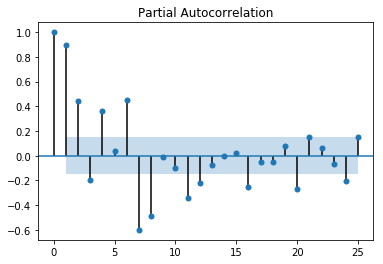

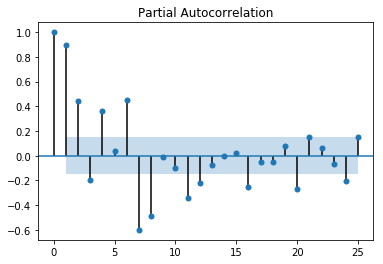

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['sqrt_A'],lags=25)

In [51]:
df1 = pd.to_datetime(df['Epoch_Time_of_Clock'])

df['Epoch_Time_of_Clock']=df1
df.Timestamp = pd.to_datetime(df['Epoch_Time_of_Clock'],format='%Y-%m-%d %H:%M:%S') 

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [52]:
b=df['sqrt_A']
b.index = df.Timestamp
b

Epoch_Time_of_Clock
2017-11-01 14:00:00    5153.670197
2017-11-01 16:00:00    5153.669188
2017-11-01 18:00:00    5153.669888
2017-11-01 20:00:00    5153.670305
2017-11-01 22:00:00    5153.673241
2017-11-02 00:00:00    5153.672241
2017-11-02 12:00:00    5153.672129
2017-11-02 14:00:00    5153.669369
2017-11-02 16:00:00    5153.668636
2017-11-02 18:00:00    5153.668608
2017-11-02 20:00:00    5153.669594
2017-11-02 22:00:00    5153.672066
2017-11-03 12:00:00    5153.673458
2017-11-03 14:00:00    5153.670349
2017-11-03 16:00:00    5153.669727
2017-11-03 18:00:00    5153.669182
2017-11-03 20:00:00    5153.670465
2017-11-03 22:00:00    5153.672173
2017-11-04 12:00:00    5153.675608
2017-11-04 14:00:00    5153.673035
2017-11-04 16:00:00    5153.672115
2017-11-04 18:00:00    5153.671932
2017-11-04 20:00:00    5153.672991
2017-11-04 22:00:00    5153.674004
2017-11-05 12:00:00    5153.677954
2017-11-05 14:00:00    5153.676699
2017-11-05 16:00:00    5153.675026
2017-11-05 18:00:00    5153.676235


In [53]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(b, test_size=0.25,random_state=1)
train = b.iloc[0:137]
test = b.iloc[137:177]

In [54]:
len(train)
len(test)
#train.dtypes

40

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


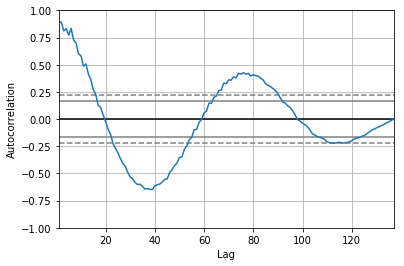

In [55]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(train)

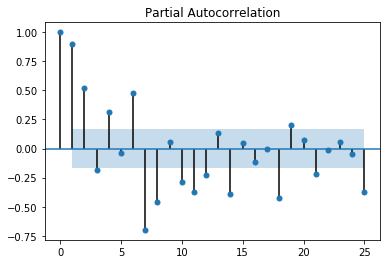

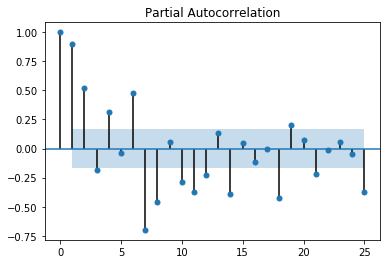

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train,lags=25)

/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a

                              ARMA Model Results                              
Dep. Variable:                 sqrt_A   No. Observations:                  137
Model:                    ARMA(17, 0)   Log Likelihood                 871.710
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 19 Feb 2019   AIC                          -1705.420
Time:                        17:31:29   BIC                          -1649.940
Sample:                             0   HQIC                         -1682.874
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5153.6769        nan        nan        nan         nan         nan
ar.L1.sqrt_A      0.1606      0.091      1.766      0.080      -0.018       0.339
ar.L2.sqrt_A      0.4538      0.090     

/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


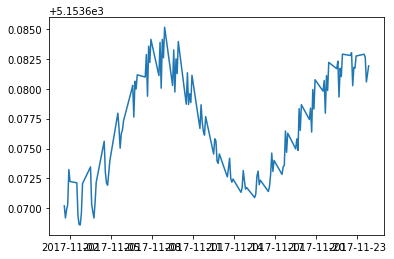

In [57]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(17,0,0))
results_AR = model.fit()
plt.plot(train)
print(results_AR.summary())

/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


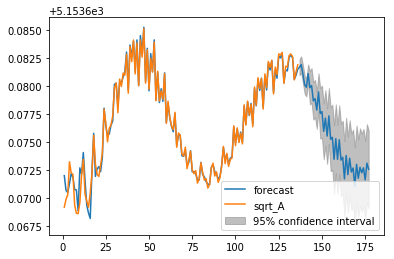

In [73]:
results_AR.plot_predict(1,177)
pr=results_AR.forecast(steps=40)
plt.show()

In [78]:
len(test)

40

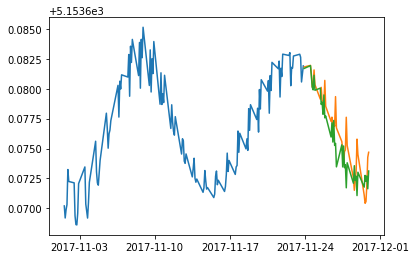

In [81]:

forecast = results_AR.forecast(steps=len(test))
forecast = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [82]:
diff=[]
e=0
for i in range(0,39):
    diff.append(test[i]-pr[0][i])
    e+=abs(test[i]-pr[0][i])
e=e/40
e


0.0012946821286504927

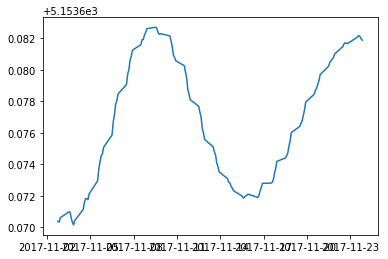

In [60]:
rm = train.rolling(window=10).mean()
plt.plot(rm)

In [ ]:
rm = df['sqrt_A'].rolling(window=5).mean()
plt.plot(rm)

In [32]:
#building the model

from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1308.012, BIC=-1302.186, Fit time=0.141 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1364.569, BIC=-1355.831, Fit time=0.058 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1350.237, BIC=-1341.499, Fit time=0.112 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1365.746, BIC=-1354.096, Fit time=0.103 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1381.681, BIC=-1364.205, Fit time=0.251 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1379.737, BIC=-1359.348, Fit time=0.546 seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1383.251, BIC=-1368.688, Fit time=0.292 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(0, 0

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

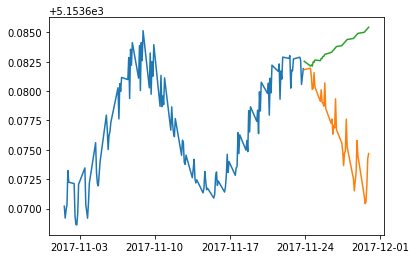

In [31]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()


In [86]:
for i in range(2,16):
    if(i!=4):
        str1=str(i)+".csv"
        print(str1)
        df = pd.read_csv(str1)
        #Perform Dickey-Fuller test:
        from statsmodels.tsa.stattools import adfuller

        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(df['sqrt_A'], autolag='AIC') 

        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value

        print(dfoutput)

2.csv
Results of Dickey-Fuller Test:
Test Statistic                  -2.964228
p-value                          0.038373
#Lags Used                      13.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64
3.csv
Results of Dickey-Fuller Test:
Test Statistic                  -0.680012
p-value                          0.851859
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
5.csv
Results of Dickey-Fuller Test:
Test Statistic                  -1.343203
p-value                          0.609182
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%

In [87]:
for i in range(2,16):
    if(i!=4):
        str1=str(i)+".csv"
        print(str1)
        df = pd.read_csv(str1)
        #Perform Dickey-Fuller test:
        from statsmodels.tsa.stattools import adfuller

        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(df['M0'], autolag='AIC') 

        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value

        print(dfoutput)

2.csv
Results of Dickey-Fuller Test:
Test Statistic                  -0.860219
p-value                          0.800790
#Lags Used                      11.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64
3.csv
Results of Dickey-Fuller Test:
Test Statistic                  -1.474674
p-value                          0.546000
#Lags Used                      10.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
5.csv
Results of Dickey-Fuller Test:
Test Statistic                  -2.055984
p-value                          0.262578
#Lags Used                       8.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%